특성 공학과 규제
다중 회귀(mutiple regression) : 하나의 특성이 아닌 여러 개의 특성을 사용한 선형 회귀 -> 직선이 아닌 평면을 학습한다.
특성 공학(feature engineering) : '농어 길이 X 농어 높이'를 새로운 특성으로 만드는 것 처럼 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

In [27]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [28]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [29]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눈다
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [30]:
# 변환기(transformer) : 특성을 만들거나 전처리하기 위해 사이킷런에서 제공하는 클래스

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]]) # 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보자
poly.transform([[2,3]]) # 특성 2와 3을 각각 제곱하거나 서로 곱한 항들이 추가되었다.(1은 절편을 위한 항이다.)

array([[1., 2., 3., 4., 6., 9.]])

In [31]:
poly = PolynomialFeatures(include_bias=False) # 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 절편을 위한 항인 1이 필요없다
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [32]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
train_poly.shape # 9개의 특성이 만들어졌다!

(42, 9)

In [33]:
# get_feature_names()로 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 확인할 수 있다
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [34]:
test_poly = poly.transform(test_input)

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982125

In [36]:
lr.score(test_poly, test_target)
# 과소적합 문제 해결

0.9714559911594223

In [37]:
poly = PolynomialFeatures(degree=5, include_bias = False) # degree로 필요한 고차항의 최대차수 지정가능 . degree=5 5제곱까지 특성을 만든다
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape # 55개의 특성이 만들어졌다.

(42, 55)

In [38]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999957028

In [39]:
lr.score(test_poly, test_target)

# 특성을 너무 늘리다보다 훈련 세트에 과대적합되므로 테스트 세트에서는 점수가 현저히 낮게 나온다.

-144.40508211356158

규제(regularization)
: 머신러닝 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
: 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만든다

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델
: 릿지(ridge), 라쏘(lasso)
1) ridge : 계수를 제곱한 값을 기준으로 규제를 적용
2) lasso : 계수의 절댓값을 기준으로 규제를 적용

 * Ridge

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [42]:
ridge.score(test_scaled, test_target)

0.9790693977615393

In [43]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [44]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

 - 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.
 - alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
 - alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다

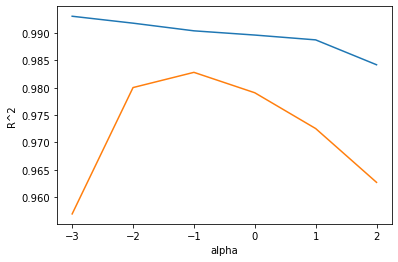

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.show()

-> 위는 훈련 세트 그래프, 아래는 테스트 세트 그래프
-> 왼쪽은 훈련세트에는 잘 맞고 테스트 세트에는 형편없는 '과대적합'의 모습
-> 오른쪽은 훈련세트와 테스트 세트의 점수가 모두 떨어지는 '과소적합'의 모습
=> 적절한 alpha값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 alpha=-1, 즉, 10^-1 = 0.1

In [46]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 훈련 세트와 테스트 세트의 점수가 비슷하게 높고 과대 적합도 과소적합도 아니다.

0.9903815817570365
0.9827976465386882


 * lasso

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print()
print(lasso.score(test_scaled, test_target))

0.989789897208096

0.9800593698421884


In [50]:
train_score = []
test_score = []
alpha_liast = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter = 10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792087, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345402686, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


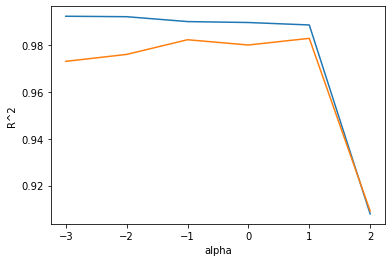

In [51]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha'); plt.ylabel('R^2')
plt.show()

-> 이 그래프도 ridge 모델처럼 왼쪽은 과대적합을 보여주고 있고 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수가 좁혀지며 가장 오른쪽은
점수가 크게 떨어지는 과소적합을 보여주고 있다. 최적의 alpha 값은 1, 즉, 10^1=10이다.

In [52]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [53]:
np.sum(lasso.coef_==0)

40

# 4-1 로지스틱 회귀

In [54]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [55]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [56]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [60]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [61]:
fish_target = fish['Species'].to_numpy()

In [62]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [63]:
# 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다
# StandardScaler 클래스로 훈련 세트와 테스트 세트를 표준화 전처리한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


다중 분류(multi-class classification)
: 타깃 데이터에 2개 이상의 클래스가 포함된 문제
: ex) 위 fish dataframe에서 타깃 데이터를 만들 때 7개의 생선이 담긴 fish['Species]를 사용했기 때문에 
훈련 세트와 테스트 세트의 타깃 데이터에도 7개의 생선 종류가 들어가 있다.

In [66]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [67]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해보자
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [68]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) ## predict_proba()로 클래스별 확률값을 반환한다.
np.round(proba, decimals=4) # np.round()는 기본적으로 소수점 첫째 자리에서 반올림 하지만 decimals에 몇번째 자리까지 표현할지 지정할 수 있다.

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [71]:
# 네 번째 샘플의 최근접 이웃의 클래스를 확인해보자
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

array([['Roach', 'Perch', 'Perch']], dtype=object)

로지스틱 회귀(Logistic Regression)
: 이름은 회귀이지만 분류 모델이다 !
: z = a*특성1 + b*특성2 + c*특성3 + d*특성4 + e*특성5 + f
-> Logistic Regression의 이진 분류 : z를 확률값 (0~1)로 변환해주기 위한 시그모이드 함수 ! : 1 / (1 + e^-z)

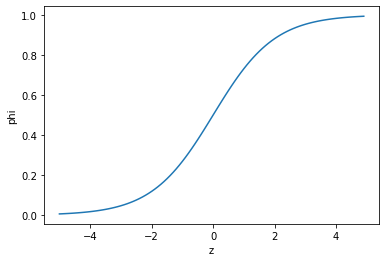

In [72]:
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 지수함수 계산은 np.exp()
plt.plot(z, phi)
plt.xlabel('z'); plt.ylabel('phi')
plt.show()

로지스틱 회귀로 이진 분류 수행하기

Logistic Regression의 이진 분류 : z를 확률값 (0~1)로 변환해주기 위한 시그모이드 함수 ! : 1 / (1 + e^-z)

In [73]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [79]:
bream_smelt_indexes = (train_target == 'Bream') |(train_target == 'Smelt')
# | : or 연산자 => 도미(Bream)일 경우 'True', 빙어(smelt)일 경우 'False'다.
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [81]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [82]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [84]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [85]:
lr.coef_, lr.intercept_
# => z = -0.404*weight - 0.576*length -0.663*diagonal -1.013*height - 0.732*width - 2.161

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [86]:
# LogisticRegression 클래스는 decision_function()으로 z값을 출력할 수 있다.
## train_bream_smelt의 처음 5개 샘플의 z값을 출력해보자

decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

로지스틱 회귀로 다중 분류 수행하기

LogisticRegression
- max_iter : 반복 횟수 지정 (default:100)
- C : 규제를 제어 (alpha와 반대로 작을수록 규제가 커짐. default: 1)

In [87]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [88]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [89]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [90]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [91]:
lr.coef_.shape, lr.intercept_.shape

((7, 5), (7,))

Logistic Regression의 이진 분류 : z를 확률값 (0~1)로 변환해주기 위한 소프트맥스 함수
(하나의 선형 방정식의 출력값을 0~1 사이로 압축하는 시그모이드 함수와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고
전체 합이 1이 되도록 만든다.(정규화된 지수 함수 라고도 부른다))

In [94]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals=2)

array([[ -6.5 ,   1.03,   5.16,  -2.73,   3.34,   0.33,  -0.63],
       [-10.86,   1.93,   4.77,  -2.4 ,   2.98,   7.84,  -4.26],
       [ -4.34,  -6.23,   3.17,   6.49,   2.36,   2.42,  -3.87],
       [ -0.68,   0.45,   2.65,  -1.19,   3.26,  -5.75,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.11,   3.5 ,  -0.11,  -0.71]])

In [95]:
# 사이파이는 소프트맥스 함수를 제공한다
from scipy.special import softmax
proba = softmax(decision, axis=1)
np.round(proba, decimals=3)
## 결과가 위에서 구한 proba 배열과 일치한다 !

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])